# <span style="color:#F72585"><center>Eliminación de Ruido: Ejemplo MNIST</center></span>


## <span style="color:#4361EE">Introducción</span>

En este cuaderno se implementa un Autoencoder Convolucional para la eliminación de ruido usando el conjunto de datos MNIST.

Basado en 

- [Convolutional Autoencoders for Image Noise Reduction](https://towardsdatascience.com/convolutional-autoencoders-for-image-noise-reduction-32fce9fc1763)

- [Convolutional Autoencoder For Image Denoising](https://keras.io/examples/vision/autoencoder/) 

## <span style="color:#4361EE">Autocodificador o autoencoder</span>

Recordemos un poco el concepto gráfico de lo que significa un autoenconder:

![CAE](https://miro.medium.com/max/2400/1*VYH3i2-2CZ6Fyd7Bv9UHFw.png)

Fuente: [Super-Resolution Using Autoencoders and TF2.0](https://medium.com/analytics-vidhya/super-resolution-using-autoencoders-and-tf2-0-505215c1674)

## <span style="color:#4361EE">Importa módulos</span>

In [1]:
# Módulos especificos de tensorflow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

#from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

# arreglos
import numpy as np

# Manejo de gráficos
import matplotlib.pyplot as plt


In [2]:
np.set_printoptions(linewidth=125)

## <span style="color:#4361EE">Lectura de los datos</span>

In [3]:
# Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normaliza los datos
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
x_train = np.reshape(x_train, newshape=(-1,28,28,1))
x_test = np.reshape(x_test, newshape=(-1,28,28,1))

In [6]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.

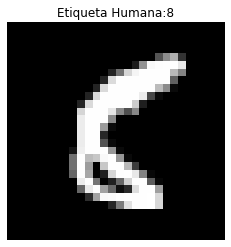

In [7]:
azar=np.random.randint(len(x_train))
print(x_train[azar,:,:,0],'\n')
plt.imshow(x_train[azar,:,:,0],cmap='gray')
plt.title('Etiqueta Humana:'+str(y_train[azar]))
plt.axis('off')
plt.show()

## <span style="color:#4361EE">Añade Ruido</span>

In [8]:
def noise(array):
    """
    Añade ruido a la imagen 
    """
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0) # clip para dejar los valores en [0.0, 1.0]

# Crea una copia de los datos con ruido agregado
noisy_x_train = noise(x_train)
noisy_x_test = noise(x_test)

## <span style="color:#4361EE">Despliega Imágenes </span>

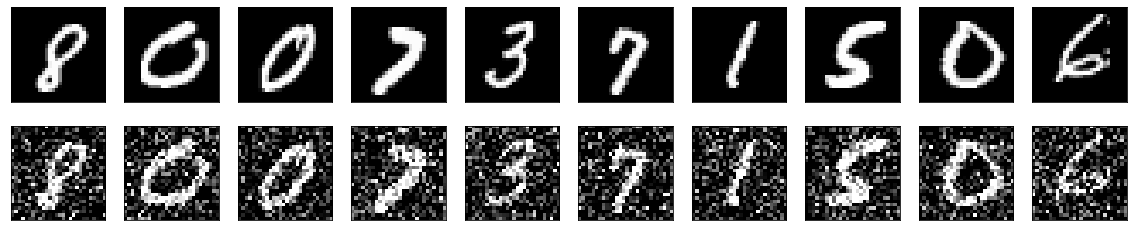

In [9]:
def display(array1, array2):
    """
    Despliega diez imágenes aleatoriamente, de los conjuntos de datos recibidos.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()
    

# despliega algunos datos origonales y su versión con ruido
display(x_train, noisy_x_train)    

## <span style="color:#4361EE">Autoenconder Convolucional </span>

In [10]:
inputs = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(inputs, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

### <span style="color:#4CC9F0">Entrenar Autoencoder</span>


In [11]:
history=autoencoder.fit(
    x=x_train,
    y=x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Epoch 1/20
469/469 [==============================] - 122s 258ms/step - loss: 0.1299 - val_loss: 0.0727
Epoch 2/20
469/469 [==============================] - 128s 273ms/step - loss: 0.0712 - val_loss: 0.0693
Epoch 3/20
469/469 [==============================] - 125s 266ms/step - loss: 0.0691 - val_loss: 0.0680
Epoch 4/20
469/469 [==============================] - 129s 276ms/step - loss: 0.0680 - val_loss: 0.0671
Epoch 5/20
469/469 [==============================] - 130s 278ms/step - loss: 0.0672 - val_loss: 0.0664
Epoch 6/20
469/469 [==============================] - 132s 282ms/step - loss: 0.0666 - val_loss: 0.0660
Epoch 7/20
469/469 [==============================] - 117s 249ms/step - loss: 0.0662 - val_loss: 0.0655
Epoch 8/20
469/469 [==============================] - 117s 250ms/step - loss: 0.0658 - val_loss: 0.0652
Epoch 9/20
469/469 [==============================] - 117s 249ms/step - loss: 0.0654 - val_loss: 0.0648
Epoch 10/20
469/469 [==============================] - 111s 237m

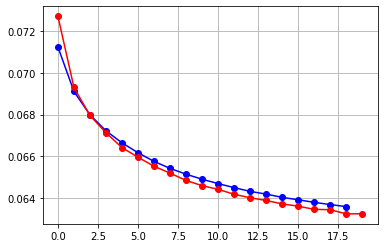

In [12]:
plt.plot(history.history['loss'][1:],'bo-')
plt.plot(history.history['val_loss'][-20:],'ro-')
plt.grid()
plt.show()

### <span style="color:#4CC9F0">Mostrar Recuperación</span>


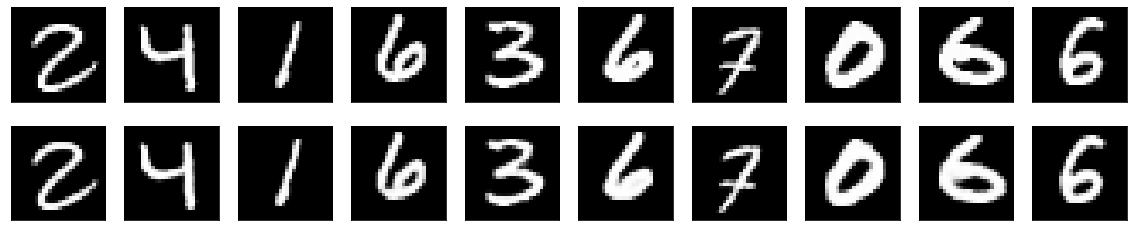

In [13]:
predictions = autoencoder.predict(x_test)
display(x_test, predictions)

### <span style="color:#4CC9F0">Entrenar sobre imágenes ruidosas</span>


In [14]:
autoencoder2 = Model(inputs, x)
autoencoder2.compile(optimizer="adam", loss="binary_crossentropy")

In [15]:
history2=autoencoder2.fit(
    x=noisy_x_train,
    y=x_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_x_test, x_test),
)

Epoch 1/100
469/469 [==============================] - 119s 249ms/step - loss: 0.0980 - val_loss: 0.0923
Epoch 2/100
469/469 [==============================] - 113s 242ms/step - loss: 0.0918 - val_loss: 0.0903
Epoch 3/100
469/469 [==============================] - 118s 252ms/step - loss: 0.0902 - val_loss: 0.0891
Epoch 4/100
469/469 [==============================] - 115s 245ms/step - loss: 0.0892 - val_loss: 0.0884
Epoch 5/100
469/469 [==============================] - 116s 248ms/step - loss: 0.0886 - val_loss: 0.0878
Epoch 6/100
469/469 [==============================] - 117s 250ms/step - loss: 0.0881 - val_loss: 0.0874
Epoch 7/100
469/469 [==============================] - 119s 253ms/step - loss: 0.0877 - val_loss: 0.0870
Epoch 8/100
469/469 [==============================] - 116s 247ms/step - loss: 0.0874 - val_loss: 0.0868
Epoch 9/100
469/469 [==============================] - 119s 254ms/step - loss: 0.0871 - val_loss: 0.0865
Epoch 10/100
469/469 [==============================] -

In [ ]:
plt.plot(history2.history['loss'][-60:],'bo-')
plt.plot(history2.history['val_loss'][-60:],'ro-')
plt.grid()
plt.show()

NameError: name 'history2' is not defined

### <span style="color:#4CC9F0">Ver Predicciones</span>


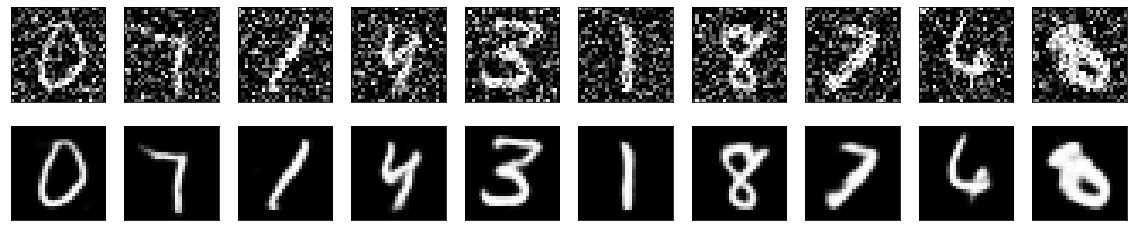

In [ ]:
predictions = autoencoder.predict(noisy_x_test)
display(noisy_x_test, predictions)